# Trying Chebyshev polynomials to obtain the physical significance

In [1]:
import xarray as xr
import dask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os, sys, glob, re, time, math, calendar
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, spearmanr, pearsonr

# import custom functions
sys.path.append('/')
from libraries import *
from plotters import *

FIGDIR = '/Users/harishbaki/Dropbox/Apps/Overleaf/NAWEA_full_paper_submitted_to_WES_special_collection'

In [1]:
import numpy as np
import sympy as sp

# Define the symbol
x = sp.symbols('x')
c0, c1, c2, c3, c4 = sp.symbols('C_0 C_1 C_2 C_3 C_4')
u = sp.symbols('u(x)')

# Define the order for the Chebyshev polynomial
order = 4

# Generate the Chebyshev polynomial of the first kind for order 4 using the recurrence relation
def chebyshev_polynomial(order):
    T = [1, x]  # T0(x) = 1, T1(x) = x
    for n in range(2, order + 1):
        Tn = 2 * x * T[n-1] - T[n-2]
        T.append(Tn)
    return T

T = chebyshev_polynomial(order)

In [ ]:
u = c0*T[0] + c1*T[1] + c2*T[2] + c3*T[3] + c4*T[4]
sp.simplify(u)

C_0 + C_1*x + C_2*(2*x**2 - 1) + C_3*(2*x*(2*x**2 - 1) - x) + C_4*(-2*x**2 + 2*x*(2*x*(2*x**2 - 1) - x) + 1)

In [4]:
T[2].evalf(subs={x: 0.5})

-0.500000000000000

In [6]:
sp.simplify(T[0]), sp.simplify(T[1]), sp.simplify(T[2]), sp.simplify(T[3]), sp.simplify(T[4])

(1, x, 2*x**2 - 1, x*(4*x**2 - 3), 8*x**4 - 8*x**2 + 1)

In [ ]:
ChSh = np.array([10,0,0,0,2]).reshape(-1,1)
z = np.arange(0,500.1,10)
M = WindProfile(z, ChSh, poly_order=poly_order, CPtype=1, ref_H=z)
plt.plot(M,z)
ChSh

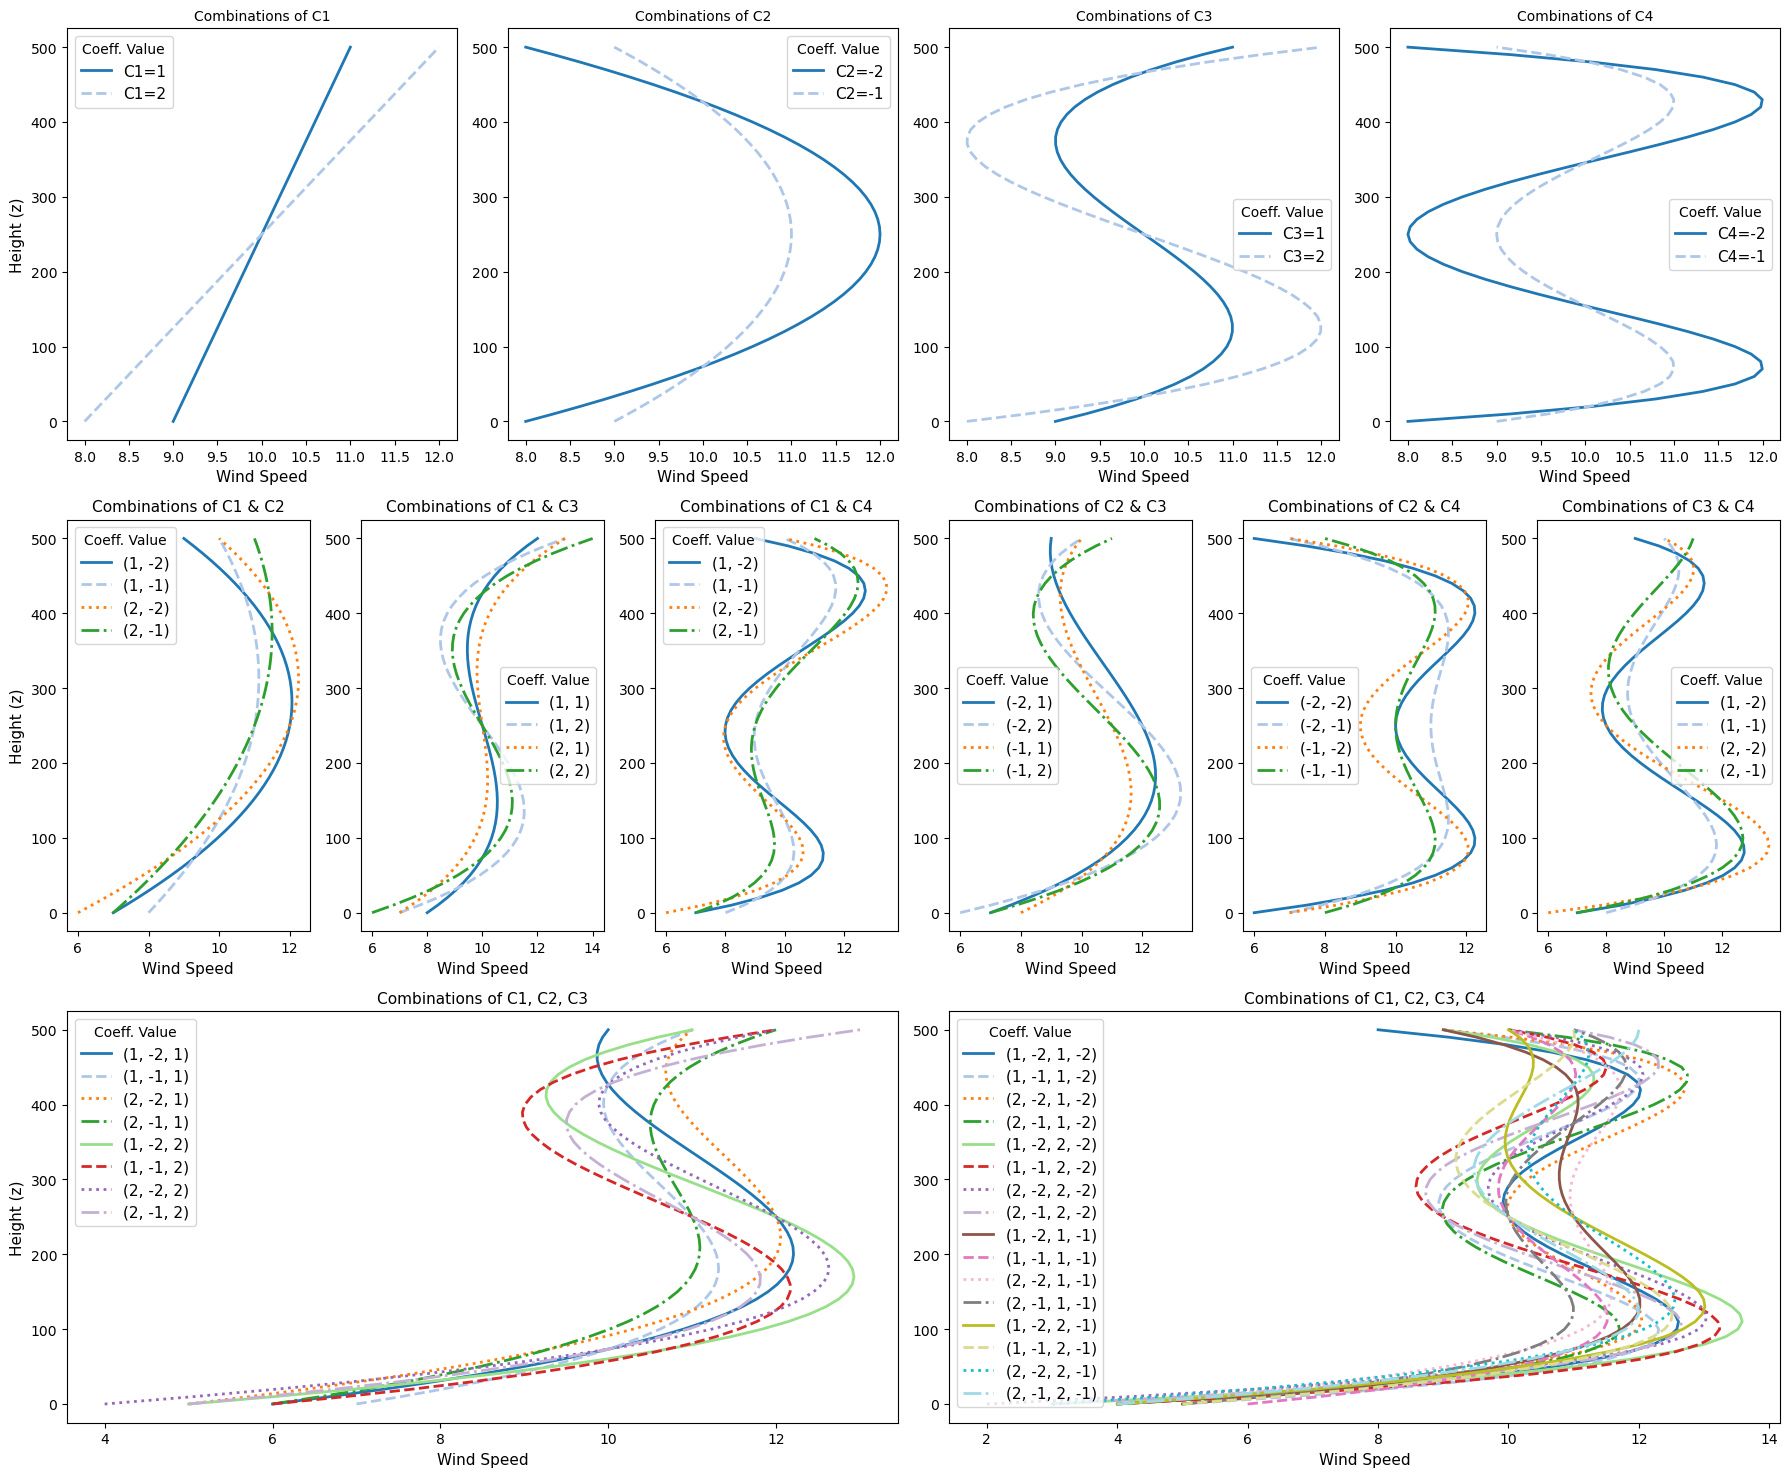

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants
z = np.arange(0, 500.1, 10)  # Height levels
ChSh_base = np.array([10, 0, 0, 0, 0]).reshape(-1, 1)  # Base coefficients
coeff_ranges = np.array([[1, 2], [-2, -1], [1, 2], [-2, -1]])  # Physical ranges for coefficients
colors = plt.cm.tab20(np.linspace(0, 1, 16))  # Tab20 color palette
line_styles = ['-', '--', ':', '-.']  # Different line styles
markers = ['o', 's', 'D', '^']  # Different markers
fontsize = 11
# Helper function to generate combinations of coefficient ranges
def generate_combinations(indices, coeff_ranges):
    selected_ranges = coeff_ranges[indices]
    combinations = np.array(np.meshgrid(*selected_ranges)).T.reshape(-1, len(indices))
    return combinations

def generate_combinations(indices, coeff_ranges):
    # Use a list comprehension to select rows of coeff_ranges
    selected_ranges = [coeff_ranges[idx] for idx in indices]
    combinations = np.array(np.meshgrid(*selected_ranges)).T.reshape(-1, len(indices))
    return combinations

# Set up the grid spec
fig = plt.figure(figsize=(18, 15))
gs = GridSpec(3, 12, figure=fig)

# --- First Row: 4 Plots (each spanning 3 columns) ---
coeff_indices = [1, 2, 3, 4]
for idx, coeff in enumerate(coeff_indices):
    ax = fig.add_subplot(gs[0, idx * 3:(idx + 1) * 3])
    for i, coeff_value in enumerate(coeff_ranges[coeff - 1]):
        # Modify the respective coefficient
        ChSh = ChSh_base.copy()
        ChSh[coeff] = coeff_value
        
        # Compute wind profile
        M = WindProfile(z, ChSh, poly_order=4, CPtype=1, ref_H=z)
        
        # Plot with increasing intensity of line color
        ax.plot(M, z, label=f"C{coeff}={coeff_value}", linestyle=line_styles[i % len(line_styles)],
                #marker=markers[i % len(markers)], 
                color=colors[i], linewidth=2)
    
    ax.set_title(f"Combinations of C{coeff}", fontsize=10)
    ax.set_xlabel("Wind Speed", fontsize=fontsize)
    if idx == 0:
        ax.set_ylabel("Height (z)", fontsize=fontsize)
    ax.legend(fontsize=fontsize, title="Coeff. Value")

# --- Second Row: 3 Plots (each spanning 4 columns) ---
pairs = [(1, 2), (1, 3), (1, 4),(2,3),(2,4),(3,4)]
for idx, (coeff1, coeff2) in enumerate(pairs):
    ax = fig.add_subplot(gs[1, idx * 2:(idx + 1) * 2])
    combinations = np.array(np.meshgrid(coeff_ranges[coeff1 - 1], coeff_ranges[coeff2 - 1])).T.reshape(-1, 2)
    for i, (val1, val2) in enumerate(combinations):
        ChSh = ChSh_base.copy()
        ChSh[coeff1] = val1
        ChSh[coeff2] = val2
        M = WindProfile(z, ChSh, poly_order=4, CPtype=1, ref_H=z)
        ax.plot(M, z, label=f"({val1}, {val2})", linestyle=line_styles[i % len(line_styles)],
                #marker=markers[i % len(markers)], 
                color=colors[i], linewidth=2)
    ax.set_title(f"Combinations of C{coeff1} & C{coeff2}", fontsize=fontsize)
    ax.set_xlabel("Wind Speed", fontsize=fontsize)
    if idx == 0:
        ax.set_ylabel("Height (z)", fontsize=fontsize)
    ax.legend(fontsize=fontsize, title="Coeff. Value")

# --- Third Row: 2 Plots (each spanning 6 columns) ---
rows = [(0, 1, 2), (0, 1, 2, 3)]  # Indices for varying coefficients
titles = ["Combinations of C1, C2, C3", "Combinations of C1, C2, C3, C4"]
for idx, comb_indices in enumerate(rows):
    ax = fig.add_subplot(gs[2, idx * 6:(idx + 1) * 6])
    combinations = generate_combinations(comb_indices, coeff_ranges)
    for i, comb in enumerate(combinations):
        ChSh = ChSh_base.copy()
        for j, val in zip(comb_indices, comb):
            ChSh[j + 1] = val
        M = WindProfile(z, ChSh, poly_order=4, CPtype=1, ref_H=z)
        ax.plot(M, z, label=f"{tuple(comb)}", linestyle=line_styles[i % len(line_styles)],
                #marker=markers[i % len(markers)], 
                color=colors[i], linewidth=2)
    ax.set_title(titles[idx], fontsize=fontsize)
    ax.set_xlabel("Wind Speed", fontsize=fontsize)
    if idx == 0:
        ax.set_ylabel("Height (z)", fontsize=fontsize)
    ax.legend(fontsize=fontsize, title="Coeff. Value")

# Adjust layout and display
plt.tight_layout()

plt.savefig(os.path.join(FIGDIR, 'Sample_wind_profiles_from_Chebyshev_combinations.p'), dpi=300)
